In [45]:
# import libraries
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
import pickle
import sklearn
import os
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [46]:
# read file
df_original=pd.read_csv("Position_Salaries.csv")

df =df_original
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [47]:
df.shape

(10, 3)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [49]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [50]:
# checks for null values
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [51]:
# checks for duplicate values
df.duplicated().sum()

0

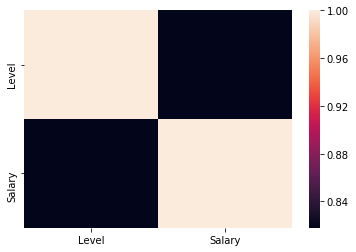

In [52]:
# checks correlation with all columns
corr=df.corr()
sb.heatmap(corr)

In [53]:
# checks correlation with all columns
print(corr['Salary'].sort_values(ascending=False)[:])

Salary    1.000000
Level     0.817949
Name: Salary, dtype: float64


In [54]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [55]:
df = df[['Level','Salary']]

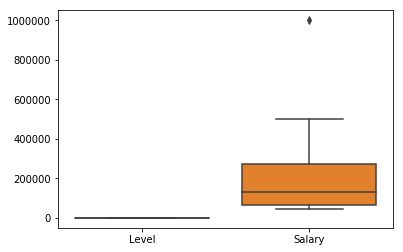

In [56]:
sb.boxplot(data=df)

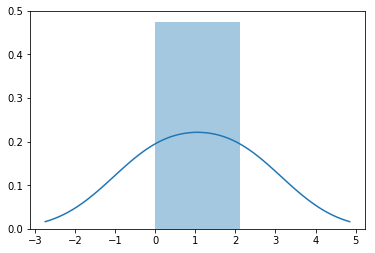

In [57]:
# display skewness of dataframe
target=df.skew()
sb.distplot(target)

In [58]:
# splitting data into train & test dataset
train,test=train_test_split(df,test_size=0.3)

In [59]:
print("train",train.shape)
print("test",test.shape)

train (7, 2)
test (3, 2)


In [60]:
# saving datasets into csv filesS
test.to_csv('test_data.csv',index=False,encoding='utf-8')
train.to_csv('train_data.csv',index=False,encoding='utf-8')


In [61]:
# loading training data csv file
train_df = pd.read_csv('train_data.csv')
train_df.head()

FileNotFoundError: [Errno 2] File b'CSV_file/train_data.csv' does not exist: b'CSV_file/train_data.csv'

In [ ]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_df,test_size=0.3)

In [ ]:
# separating features and labels of training dataset
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values


In [ ]:
# saving cross validation data into csv file
cv_data.to_csv('cv_data.csv',index=False,encoding='utf-8')

In [ ]:
# fitting simple linear regression model to the training dataset
# lin_reg = LinearRegression(normalize=True)  
# lin_reg.fit( x_train, y_train)  

# fitting polynomial regression model to the training dataset
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
# fit into multiple Linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)

In [ ]:
y_pred=lin_reg2.predict(poly_reg.fit_transform(x_train))
pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})                                

In [ ]:
# loading cross validation dataset file
cv_data = pd.read_csv('cv_data.csv')
cv_data.head()

In [ ]:
# separate labels and features of cross validation dataset
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values

In [ ]:
class PolynomialRegression:
    
    def fit_model(self,x_train,y_train):        
        # getting prediction values on train dataset
        y_pred_train=lin_reg2.predict(poly_reg.fit_transform(x_train))
        
        return y_pred_train
    
    def fit_model_cv(self,x_cv):
        # getting prediction values cross validation dataset 
        y_pred=lin_reg2.predict(poly_reg.fit_transform(x_cv))
        return y_pred
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.r2_score(y_train,y_pred)*100
        return Accuracy
        
    def visualize_trainset(self,y_pred_train):
        # visualizing the training set result
        x_grid=np.arange(min(x_train),max(x_train),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_train,y_train,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict salary  based on position (Training Set)')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        
    def visualize_cvset(self,y_pred_test):
        # visualizing the testing set result
        x_grid=np.arange(min(x_cv),max(x_cv),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_cv,y_cv,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict salary  based on position (Cross Validation Set)')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        
def main():
    # creates class object 
    obj = PolynomialRegression()
    y_pred_train = obj.fit_model(x_train,y_train)
    
    y_pred_test = obj.fit_model_cv(x_cv)
    
    acc_train = obj.get_accuracy(y_train,y_pred_train)
    print("Accuracy of train data =",acc_train)
    
    acc_test = obj.get_accuracy(y_cv,y_pred_test)
    print("Accuracy of test data =",acc_test)
     
    obj.visualize_trainset(y_pred_train)
    obj.visualize_cvset(y_pred_test)
    
if __name__ == '__main__':
    main()
    


In [ ]:
fileObject = open("train_data.pkl",'wb')
pickle.dump(poly_reg,fileObject)  
pickle.dump(lin_reg2,fileObject)   
# here we close the fileObject
fileObject.close()